In [5]:
import numpy as np
import pandas as pd
import nltk
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
dataset = pd.read_csv("https://raw.githubusercontent.com/nitesh31mishra/Sentiment-Analysis-of-tweets/master/Tweets.csv", encoding = "utf-8")  


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,latitude,longitude
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35.888455,-119.273781
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,37.770971,-119.941025
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,35.684863,-119.709299
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,37.061159,-119.279135
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,36.790587,-120.867752


In [21]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,latitude,longitude
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35.888455,-119.273781
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,37.770971,-119.941025
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,35.684863,-119.709299
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,37.061159,-119.279135
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,36.790587,-120.867752


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

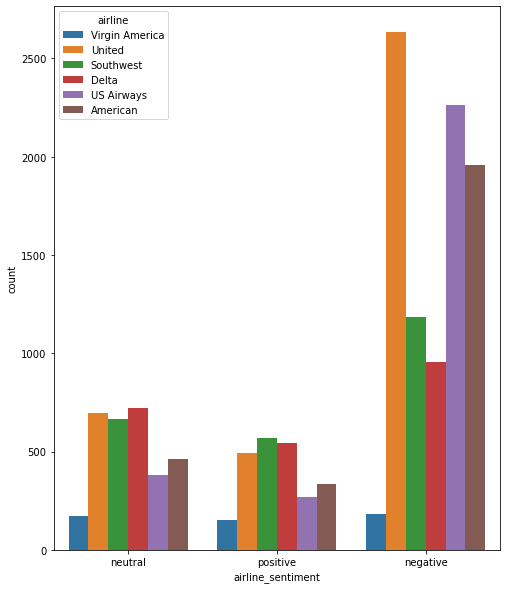

In [12]:
sns.countplot(x='airline_sentiment', data=dataset, hue = 'airline')

In [11]:
def text_preprocess(sen): 
   sen = re.sub('[^a-zA-Z]', ' ', sen)
   sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen)
   sen = re.sub(r'\s+', ' ', sen)
   return sen

In [13]:
X = dataset["text"]  
 
y = dataset["airline_sentiment"]

In [14]:
X_tweets = []  
messages = list(X)  
for mes in messages:  
    X_tweets.append(text_preprocess(mes))

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import TfidfVectorizer  
  
tfidf_vec = TfidfVectorizer (max_features=5000, min_df=50, max_df=0.8, stop_words=stopwords.words('english'))  
X= tfidf_vec.fit_transform(X_tweets).toarray()

In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
pred_lr=LR.predict(X_test)

In [23]:
LR.score(X_test, y_test)

0.7743169398907104

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(confusion_matrix(y_test,pred_lr)) 
print(classification_report(y_test,pred_lr)) 
print(accuracy_score(y_test,pred_lr))

[[2137  141   62]
 [ 339  349   50]
 [ 159   75  348]]
              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      2340
     neutral       0.62      0.47      0.54       738
    positive       0.76      0.60      0.67       582

    accuracy                           0.77      3660
   macro avg       0.73      0.66      0.69      3660
weighted avg       0.76      0.77      0.76      3660

0.7743169398907104


In [27]:
from sklearn.tree import DecisionTreeClassifier
DT =DecisionTreeClassifier()
DT.fit(X_train,y_train)
pred_dt=DT.predict(X_test)

In [28]:
DT.score(X_test, y_test)

0.6658469945355191

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(confusion_matrix(y_test,pred_dt)) 
print(classification_report(y_test,pred_dt)) 
print(accuracy_score(y_test,pred_dt))

[[1855  330  155]
 [ 364  286   88]
 [ 183  103  296]]
              precision    recall  f1-score   support

    negative       0.77      0.79      0.78      2340
     neutral       0.40      0.39      0.39       738
    positive       0.55      0.51      0.53       582

    accuracy                           0.67      3660
   macro avg       0.57      0.56      0.57      3660
weighted avg       0.66      0.67      0.66      3660

0.6658469945355191
